### model summary

In [1]:
import json
import model
from summary import model_summary

C:\Users\marke\anaconda3\envs\py38\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\marke\anaconda3\envs\py38\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_mask

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [2]:
import pandas as pd
import numpy as np

### load test data

In [3]:
data_test_df = pd.read_parquet("./output/data_test_df.parquet")

### recreate model

In [4]:
# load training_config.json into dictionary
with open("./output/marketing_model.json") as file:
    # Load its content and make a new dictionary
    training_config = json.load(file)

In [5]:
training_config

{'numeric_features': ['age', 'years_in_sf', 'household_members', 'under_18'],
 'categorical_features': ['sex',
  'marital_status',
  'education',
  'occupation',
  'dual_income',
  'household_status',
  'type_of_home',
  'ethnic_class',
  'language'],
 'target': 'target',
 'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1,
 'booster': 'gbtree',
 'objective': 'binary:logistic',
 'random_state': 40,
 'scale_pos_weight': 1}

In [6]:
# create model with training config
pipe_final_new = model.ClassificationModel(training_config)

In [7]:
# load trained model
pipe_final_new.load_model("./output/marketing_model")

2023-09-11 20:20:20.456 | INFO     | model:load_model:213 - Loaded sklearn pipeline from ./output/marketing_model.


### predict on test data

In [8]:
pipe_final_new.evaluate(data_test_df)

2023-09-11 20:20:20.504 | INFO     | model:evaluate:202 - Computed metrics...


(array([[0.7716086 , 0.22839142],
        [0.1419295 , 0.8580705 ],
        [0.5132678 , 0.48673218],
        ...,
        [0.9978479 , 0.0021521 ],
        [0.02820557, 0.9717944 ],
        [0.3578518 , 0.6421482 ]], dtype=float32),
 {'f1_score': 0.8084042021010506,
  'roc_auc': 0.8683116704748349,
  'precision': 0.800792864222002,
  'recall': 0.8161616161616162,
  'balanced_acc': 0.7838533667952704,
  'accuracy': 0.7871039466370205})

### create dataframe with predictions

In [9]:
predictions_df = pipe_final_new.predict(data_test_df)

2023-09-11 20:20:20.548 | INFO     | model:predict:155 - Computed predictions for 1799 records


In [10]:
predictions_df

,sex,marital_status,education,occupation,dual_income,household_status,type_of_home,ethnic_class,language,age,years_in_sf,household_members,under_18,target,prediction_probability,prediction,prediction_datetime
0,1,5.0,5.0,6.0,1,2.0,5.0,7.0,1.0,2.0,4.0,3.0,0.0,1,0.228391,0,2023-09-11 20:20:20.554236
1,2,1.0,3.0,4.0,2,2.0,1.0,7.0,1.0,6.0,5.0,3.0,1.0,1,0.858070,1,2023-09-11 20:20:20.554236
2,2,5.0,5.0,1.0,1,2.0,3.0,7.0,1.0,2.0,5.0,1.0,0.0,0,0.486732,0,2023-09-11 20:20:20.554236
3,2,1.0,3.0,1.0,2,1.0,5.0,7.0,1.0,4.0,5.0,4.0,1.0,1,0.970333,1,2023-09-11 20:20:20.554236
4,2,5.0,5.0,1.0,1,3.0,1.0,7.0,1.0,3.0,5.0,3.0,0.0,1,0.627002,1,2023-09-11 20:20:20.554236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,1,3.0,3.0,4.0,1,nan,1.0,5.0,1.0,3.0,5.0,3.0,1.0,0,0.658221,1,2023-09-11 20:20:20.554236
1795,2,1.0,5.0,5.0,3,1.0,1.0,7.0,1.0,3.0,3.0,3.0,1.0,1,0.911670,1,2023-09-11 20:20:20.554236
1796,2,5.0,2.0,6.0,1,3.0,3.0,7.0,nan,1.0,4.0,2.0,1.0,0,0.002152,0,2023-09-11 20:20:20.554236
1797,2,1.0,5.0,1.0,2,1.0,1.0,8.0,1.0,5.0,5.0,3.0,0.0,1,0.971794,1,2023-09-11 20:20:20.554236


### model summary (with test data)

In [11]:
# tranform test data
transformed_data_test = pipe_final_new.transform(data_test_df)

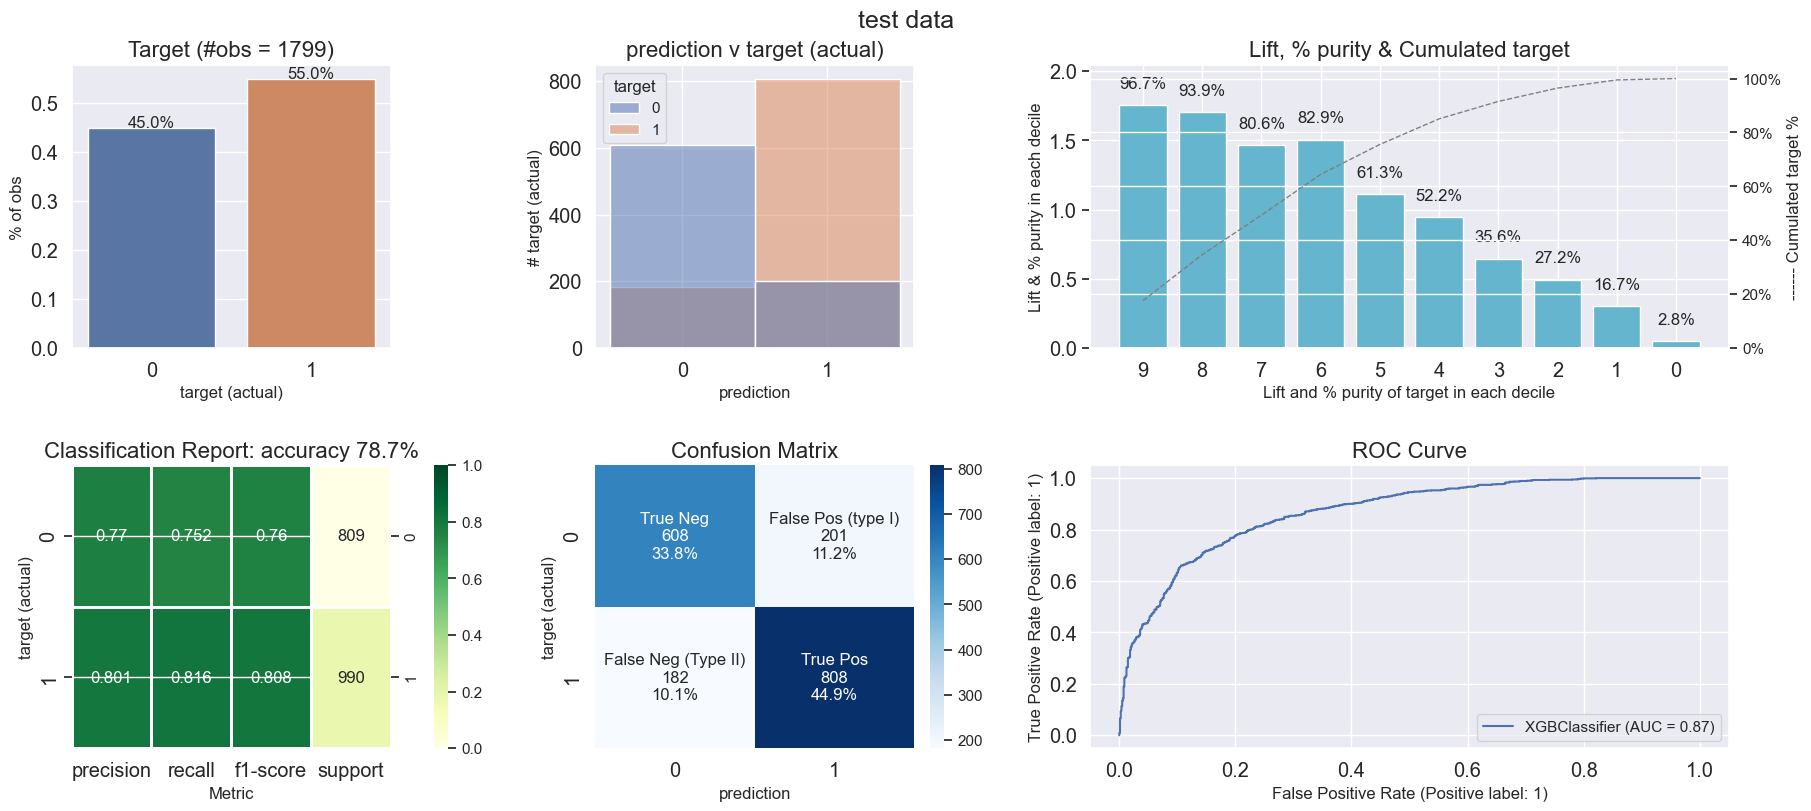

In [12]:
# create model report using transformed test data
model_summary(model=pipe_final_new.model_instance['classifier'], X_test_df=transformed_data_test, y_test=data_test_df.target, dataset_name="test")